# P2 Investigate a Dataset
## Titanic Survivors

In this project, with the use of Python and its Numpy, Pandas, Matplotlib packages, as well as the Statsmodels package, I examine a set of passenger and crew information onboard the Titanic, a British passenger liner that sank on 15 April 1912 about 370 miles off the coast of Newfoundland on her maiden voyage between Southampthon and New York From history, we are informed that out of the 2224 passengers and crew onboard, 1502 did not survive, making this one of the most disastrous shipwrecks in history.

The dataset, containing 891 passenger records, is obtained from the [Kaggle website]( https://www.kaggle.com/c/titanic/data "Data Source"). 

## Overview

In this analysis project, my goal is to explore what factors are involved for a Titanic passenger surviving the tragedy. I approach this goal by first asking the following questions:

* What is the demographics of the passengers onboard the Titanic?
* Does age make a difference among those who survived and those who did not?
* Does gender make a difference?
* How about the passenger class assignment?
* If the passenger traveled with family members, how does the survival rate differ?

Bearing in mind that the set of 891 records is not complete, since we are informed through historical sources of 2224 passengers and crew, I will only explore what might likely be the case for the records I have obtained. It will be an assumption that these results may apply to the rest in the Titanic tragedy.

I will be relying on the pandas package to do the heavy lifting of data-wrangling, as well as plotting. There will be occasions I use the numpy and the matplotlib packages to access their functions. Statistical tests will be carried out using the statsmodels package.

## Titanic Dataset

The data records are stored in a .csv (comma-separated value) file. Each row contains a passenger record and each record has a value stored in each column. Thus each column may be treated as a data variable. Below shows the python code to load up the data and stored as a Pandas dataframe, named as _df_.

In [32]:
### Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('seaborn-white')

### Load the dataset into a pandas dataframe
df = pd.read_csv('titanic_data.csv')


In [33]:
## First peek at the data structure.
print "Number of records: ", len(df), "\n"

print "Variable names:"
print df.columns.values

df.head(5)

Number of records:  891 

Variable names:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.Survived.unique()

array([0, 1])

##### Variable Descriptions
Visitors to this project are welcomed to visit the [Kaggle site](https://www.kaggle.com/c/titanic/data "Variable description") for the description of the variables.

##### Dependent Variable
The dependent variable is identified as _'Survived'_ since we want to know who survived and who did not. Given that the number of passengers is likely different when broken down to different groups, _e.g. by gender_, the comparison by the raw count of survivors will not be easy. For this reason, I will use the proportion of survivors instead of a raw count, so I can apply the same measure and make comparisons across different groups. This measure of proportion will be named as _survival rate_ for a given group and is defined as:

Survival rate = Number of survivors / Number of persons within the group considered

Since the _Survived_ column is encoded with 1 for having survived the tragedy and 0 otherwise, the simplest way to compute the _survival rate_ is just taking the mean from the _Survived_ column.

##### Independent Variables
It seems intuitive to consider _'Sex'_, _'Age'_, and '_Pclass'_ as independent variables. These variables relate back to the question of what factors are involved surviving the Titanic tragedy. We note that the _'Sex'_ and '_Pclass'_ variables hold discrete values, whereas the '_Age_' variable is continuous.

I am also interested in the survival rate of those who traveled with family. To do this, I will be interpreting that the passenger had family onboard if either the _'SibSp'_ or the _'Parch'_ variable holds a non-zero value. 

##### Helper Functions
The helper function **withFamily()** is coded to assign the family onboard status. The result of this check is stored as a boolean type array into the dataframe, under the variable name _'wFamily'_. 

The other helper function, **survival_Rate_Table**, is created for repeated use throughout the project. This function takes in the dataframe and its column names as arguments and it returns a table of survival rates.

In [35]:
#### HELPER FUNCTIONS ####

def withFamily( df ):
    ### Assigns True if passenger traveled with siblings, spouse, parents or children
    return np.logical_or(df.SibSp != 0, df.Parch !=0)

def survival_Rate_Table( df, indexName, columnName):
    ###
    ### Function aggregates the data by the levels/categories in 'columnName' and cross-tabulates against 
    ### the levels/categories in 'indexName'.
    ### It returns a cross-tabulated set of survival rate values.
    ###
    ### See pandas documentation on pivot_table for more information.
    ###
    ### indexName, columnName: Use variable names that contain the levels/categories to be grouped 
    ###                        Possible options: 'Pclass', 'Sex', 'AgeGroup', 'wFamily'
    ###

    ### First Table
    table_All = pd.pivot_table(df, 
                               values = 'Survived', 
                               index = indexName, 
                               columns = columnName, 
                               aggfunc = len)
    ### Second Table (For Survivors)
    table_Survived = pd.pivot_table(df[df.Survived == 1], 
                                    values = 'Survived', 
                                    index = indexName, 
                                    columns = columnName,
                                    aggfunc = len)
    ### Element-wise division
    return table_Survived.divide(table_All, fill_value = 0)

### Data Cleaning

In [36]:
### Assigning Family Onboard Status to the records
df.loc[:,'wFamily'] = withFamily(df.copy())

### Check for Invalid Entries
print "Number of records with no age entry: ", sum(df.Age.isnull())

Number of records with no age entry:  177


There are 177 passenger records with no record of age. These records will be discarded for the sake of carrying out age-related analyses, as well as for the sake of a consistent, tidy data. I feel that the intended loss of information is acceptable because the dataset is not complete to begin with and I think the age variable is important, from which a lot of information can be uncovered.

In [37]:
### Remove records without an age entry
df = df[df.Age.notnull()]
print len(df)

714


### First Look - Titanic Passengers Demographics

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Overall survival rate:  0.406162464986


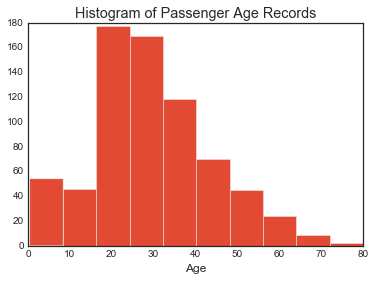

In [38]:
### Statistical summary of age records
print df.Age.describe()

print "\nOverall survival rate: ", df.Survived.mean() 

### Histogram plot: passenger age records
plt.hist(df.Age)
plt.xlabel('Age')
plt.title('Histogram of Passenger Age Records')

This dataset reveals that the overall survival rate is only 0.406. History tells us that there are 722 survivors out of 2224 passengers and crew, which equates to a survival rate of 0.325. We will proceed to find out whether or not there is a significant difference in the survival rates between the dataset and history record.

In [39]:
### Statistical Test: One Sample Z-Test
import statsmodels.stats.weightstats as stats
z_score, p_val = stats.ztest(df.Survived, value = 0.325)

print "p-value: ", p_val

p-value:  1.02032511804e-05


The p-value indicates that the survival rate from this dataset is significantly different from what is known from  history. Unfortunately, this could mean it is not advisable to use this dataset to represent the rest in the Titanic tragedy. For now, we will bear this in mind.

No. of male passengers:  453
No. of female passengers:  261

Male-to-Female ratio:  1.73563218391


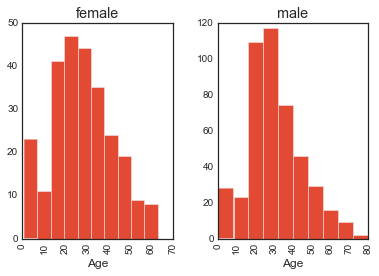

In [40]:
print "No. of male passengers: ", len(df[df.Sex == 'male'])
print "No. of female passengers: ", len(df[df.Sex == 'female'])                                         
print "\nMale-to-Female ratio: ", len(df[df.Sex == 'male'])/float(len(df[df.Sex == 'female']))

### Histogram plot: age records, grouped by gender
plot = df.hist(column = 'Age', by = 'Sex')

plot = plot.ravel()

for idx, ax in enumerate(plot):
    ax.set_xlabel('Age')


The age distributions between the male and female passengers are quite similar to the overall age distribution, but the male-to-female ratio value shows that the number of male passengers is much higher than the female passengers. The dataset also reveals that the majority of the male passengers are aged between 20 and 50. This would not be surprising. Migrants to the United States from the British Isles in the early 20th century were mainly male workers.

### Gender

Survival Rate (male):  0.205298013245
Survival Rate (female):  0.754789272031

Labels: 
1 - Survivor 
0 - Non-survivor


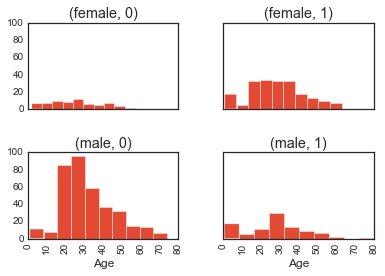

In [41]:
print "Survival Rate (male): ", df[df.Sex == 'male'].Survived.mean()
print "Survival Rate (female): ", df[df.Sex == 'female'].Survived.mean()

### Plot age histograms grouped by gender and 'Survived' status
plot = df.hist(column = 'Age', by = ['Sex','Survived'], sharex = True, sharey = True)

plot = plot.ravel()

for idx, ax in enumerate(plot):
    ax.set_xlabel('Age')
    
print "\nLabels: \n1 - Survivor \n0 - Non-survivor"

In [42]:
### Statistical Test: Two sample t-test
t_score, p_val, dof = stats.ttest_ind(df[df.Sex == 'female'].Survived, df[df.Sex == 'male'].Survived)

print "p-value: ", p_val

p-value:  5.2247099268e-55


Undoubtedly, the data shows that the survival rate for the male passenger is much lower than for the female passenger. 

In my opinion, the size of the male and female passenger groups are large enough to call for a z-test (Sample size >> 30), but I acknowledge that the t-test may later be used as I work with smaller groups. As a matter of convenience, I have decided to use the t-test for the rest of this project since the t-test in the statsmodels package will account for the degrees-of-freedom regardless of sample size.

### Age Group

The set of age records, which ranges between 0.42 and 80, will be a numerous list of values. Therefore I find it necessary to first group the age records into several bins before proceeding to obtain the survival rates. To do this, I have used the _cut_ function in pandas and defined the following age groups:
* _12 and below (Child)_
* _Between 12 and 20 (Youth)_
* _Between 20 and 35 (Young adult)_
* _Between 35 and 50 (Adult)_
* _Above 50 (Senior)_

I will next use the **survival_Rate_Table()** helper function to get the survival rates. This function cross-tabulates the _'Sex'_ variable against the _'AgeGroup'_ variable, so that I can compare the survival rates for the male and female passengers across the age groups that I have now defined.

In [43]:
### Bins and labels
age_Bins = [0, 12, 20, 35, 50, df.Age.max()]
age_Labels = ['Child', 'Youth', 'Young adult', 'Adult', 'Senior']

### Assignment of age group labels to records
df.loc[:,'AgeGroup'] = pd.cut(df.Age.copy(),age_Bins, labels=age_Labels)


Sex            female      male
AgeGroup                       
Child        0.593750  0.567568
Youth        0.755556  0.123077
Young adult  0.783784  0.183575
Adult        0.732143  0.206186
Senior       0.941176  0.127660


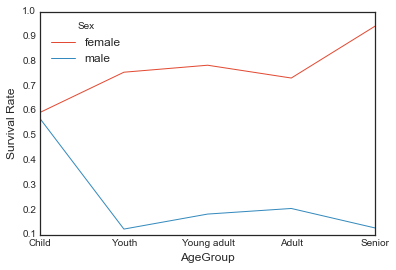

In [44]:
### Survival rates by age group
table_AgeGroup = survival_Rate_Table(df, 'AgeGroup', 'Sex')
print table_AgeGroup
table_AgeGroup.plot().set_ylabel('Survival Rate')

The female passenger survival rate is higher than the male passenger in every age group, but for the _'Child'_ group, I cannot be sure if the difference is significant. In the following, I carry out a check on the difference in the survival rate between the male child and female child.

In [45]:
child = df[df.AgeGroup == 'Child']

print "Number of males: ", len(child[child.Sex == 'male'])
print "Number of females: ", len(child[child.Sex == 'female'])

# Statistical Test: Two sample t-test
t_score, p_val, dof = stats.ttest_ind(child[child.Sex == 'female'].Survived, child[child.Sex == 'male'].Survived)

print "\np-value: ", p_val

Number of males:  37
Number of females:  32

p-value:  0.829182976961


The p-value indicates that there is no significant difference in the survival rate between the male child and the female child.

### Passenger Class

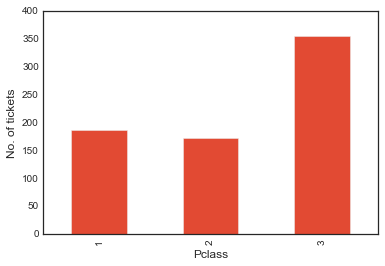

In [46]:
### Passenger class assignment
tickets = pd.pivot_table(df, values = 'Ticket', index = 'Pclass', aggfunc = len).astype(int)
tickets.plot(kind='bar').set_ylabel('No. of tickets')


In [47]:
### Average ticket price and survival rate by passenger class
mean_fares = pd.pivot_table(df, values = 'Fare', index = 'Pclass', aggfunc = np.mean)

print "Mean ticket fare by Pclass:\n", mean_fares
print "\nSurvival rate by Pclass:\n", survival_Rate_Table(df, 'Pclass', None)

Mean ticket fare by Pclass:
Pclass
1    87.961582
2    21.471556
3    13.229435
Name: Fare, dtype: float64

Survival rate by Pclass:
Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


In [48]:
### Statistical tests 
t_score, p_val1, dof = stats.ttest_ind(df[df.Pclass == 1].Survived, df[df.Pclass == 2].Survived)
t_score, p_val2, dof = stats.ttest_ind(df[df.Pclass == 2].Survived, df[df.Pclass == 3].Survived)

print "p-value (Class 1 vs 2): ", p_val1
print "p-value (Class 2 vs 3): ", p_val2

p-value (Class 1 vs 2):  0.000712492707275
p-value (Class 2 vs 3):  1.74186940763e-08


Pclass         1         2         3
Sex                                 
female  0.964706  0.918919  0.460784
male    0.396040  0.151515  0.150198


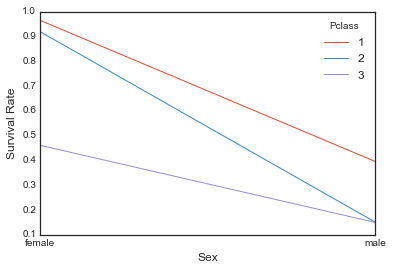

In [49]:
### Survival rates by class and sex
table_Class = survival_Rate_Table(df, 'Sex', 'Pclass')
print table_Class
table_Class.plot().set_ylabel('Survival Rate')

Most Titanic tickets were sold under _Pclass 3_, which were the cheapest on the average. Among the three class levels, the class 1 group corresponds with the highest survival rate, followed by class 2, and class 3. (Significance of results checked.)

For a simple comparison without checking on the significance of the results, female passengers have higher survival rates over male passengers in every class level.

### Traveling with Family
 


Sex        female      male
wFamily                    
False    0.790000  0.167763
True     0.732919  0.281879


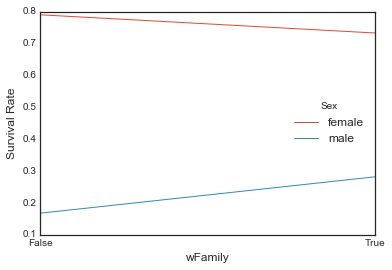

In [50]:
### Survival rates by family onboard status
table_Family = survival_Rate_Table(df, 'wFamily', 'Sex')
print table_Family
table_Family.plot().set_ylabel('Survival Rate')

In [51]:
print "Number of passengers traveling with family: ", len(df[df.wFamily])
print "Survival rate: ", df[df.wFamily].Survived.mean()

print "\nNumber of passengers not traveling with family: ", len(df[~df.wFamily])
print "Survival rate: ", df[~df.wFamily].Survived.mean()

### Statistical test on survival rates
t_score, p_val, dof = stats.ttest_ind(df[df.wFamily].Survived, df[~df.wFamily].Survived)

print "\np-value: ", p_val

Number of passengers traveling with family:  310
Survival rate:  0.516129032258

Number of passengers not traveling with family:  404
Survival rate:  0.321782178218

p-value:  1.26916682625e-07


Overall, the survival rate is better for a passenger traveling with family and the difference is significant. We also note that the female passenger still has a higher survival rate than the male passenger, with or without family onboard.

## Conclusion

As an exploratory exercise, I observe that the female passenger has better survival rate than the male passenger overall. This is also the case when I compare the female passenger survival rate across age groups, passenger classes, family onboard status.

While not all my observations are statistically tested for significance, for the ones that I did test, I observe that: 
- the male child, aged 12 and below, has similar survival rate to the female child,
- the ranking of survival rate by passenger class has the order: Class 1 > Class 2 > Class 3, and
- passengers who traveled with family have better survival rate than those who did not during the Titanic tragedy.

I have also statistically tested that the overall survival rate from this dataset is significantly different from the survival rate known from history. Therefore, caution should be exercised when using this analysis to represent the entire Titanic tragedy.


## Reflections

As I worked on this project, the initial difficulty I faced manipulating pandas dataframes was my tendency to hardcode the interactions among columns and indexes. As I explored the pandas package further, I slowly discovered pandas functions that can help shorten the coding process. Still, there are times when I find coding it with pandas functions can get quite clunky, especially when carrying out array comparison operations. That lead me to discover that it can be more efficient to switch over to numpy functions instead.

The greatest difficulty I face is deciding what to present. I find that one-variable exploration does not get very deep. There is more depth when combined with another variable. But when faced with several variables, the combination of variables increases a lot quickly. The time taken to explore the dataset also lengthens greatly. And with so many combinations to choose from, the effort to summarize the findings also greatly increases.

## References

* Dataset. In _Kaggle_. Retrieved July 3, 2016, from https://www.kaggle.com/c/titanic/data
* RMS Titanic. In _Wikipedia_. Retrieved September 5, 2016, from https://en.wikipedia.org/wiki/RMS_Titanic
* Wreck of the RMS Titanic. In _Wikipedia_. Retrieved September 5, 2016, from https://en.wikipedia.org/wiki/Wreck_of_the_RMS_Titanic
* Thomas, B.: _Migration and Economic Growth: A Study of Great Britain and the Atlantic Economy._ Cambridge University Press, Cambridge, 1954.